In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("amazon_reviews.csv")
df.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67.0,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5.0,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4.0,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13.0,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8.0,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


In [4]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')

In [5]:
df.isnull().sum()

overall              0
vote              8351
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             5786
reviewerName         2
reviewText           2
summary              0
unixReviewTime       0
image             9958
dtype: int64

In [6]:
df.drop(columns=['vote', 'verified', 'reviewTime', 'reviewerID', 'asin','style', 'reviewerName','unixReviewTime',
       'image','summary'], inplace= True)
df.head(5)

,overall,reviewText
0,5.0,This is the best novel I have read in 2 or 3 y...
1,3.0,"Pages and pages of introspection, in the style..."
2,5.0,This is the kind of novel to read when you hav...
3,5.0,What gorgeous language! What an incredible wri...
4,3.0,I was taken in by reviews that compared this b...


In [7]:
df.isnull().sum()

overall       0
reviewText    2
dtype: int64

In [8]:
df.dropna(subset=['reviewText'], inplace=True)


In [9]:
df.isnull().sum()

overall       0
reviewText    0
dtype: int64

Sentiment Distribution:
sentiment
positive    8129
negative    1140
neutral      729
Name: count, dtype: int64


C:\Users\Amaya\AppData\Local\Temp\ipykernel_12672\21595974.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


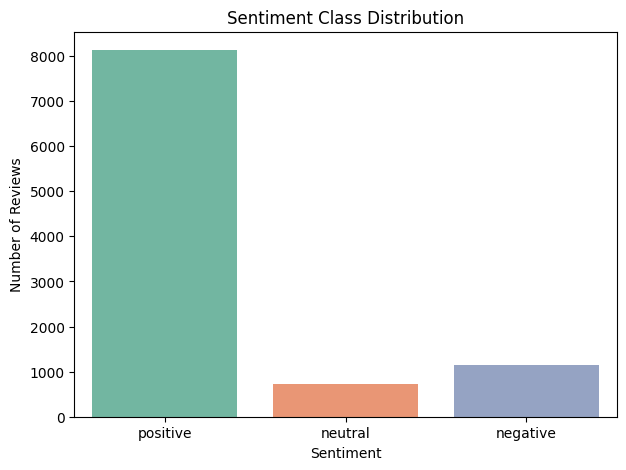

In [10]:
# Create sentiment from overall
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(rating_to_sentiment)

# Check class distribution
print("Sentiment Distribution:")
print(df['sentiment'].value_counts())

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [11]:
df["sentiment"]

0       positive
1        neutral
2       positive
3       positive
4        neutral
          ...   
9995    positive
9996     neutral
9997    positive
9998    positive
9999    positive
Name: sentiment, Length: 9998, dtype: object

In [12]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)          # Remove URLs
    text = re.sub(r"@\w+", "", text)             # Remove mentions
    text = re.sub(r"#\w+", "", text)             # Remove hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)      # Remove emojis, numbers, punctuation
    text = re.sub(r"\s+", " ", text).strip()     # Remove extra spaces
    return text.lower()

df['text'] = df['reviewText'].apply(clean_text)
print(df['text'])

0       this is the best novel i have read in or years...
1       pages and pages of introspection in the style ...
2       this is the kind of novel to read when you hav...
3       what gorgeous language what an incredible writ...
4       i was taken in by reviews that compared this b...
                              ...                        
9995    this tape is great very crisp text and very ea...
9996    after i printed a label i had a hard time peel...
9997    black on white is the best it is easier to rea...
9998    once again amazon has the links to the best pr...
9999    the prices for brothers labeling tape on amazo...
Name: text, Length: 9998, dtype: object


In [13]:
df.drop(columns="reviewText", inplace=True)

In [14]:
feature = df["text"]
target = df["sentiment"]

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(feature, target, test_size=0.2, random_state=42, stratify=target)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7998,)
(7998,)
(2000,)
(2000,)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

x_train_tfid = vectorizer.fit_transform(x_train)
x_test_tfid = vectorizer.transform(x_test)

In [18]:
print(x_train_tfid.shape)
print(x_test_tfid.shape)

(7998, 5000)
(2000, 5000)


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression( class_weight='balanced')
model_lr.fit(x_train_tfid,y_train)
y_pred = model_lr.predict(x_test_tfid)

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=model_lr.classes_)

print("Accuracy Score:", acc_lr)
print(c_lr)
print(cm)


Accuracy Score: 0.7895
              precision    recall  f1-score   support

    negative       0.57      0.76      0.65       228
     neutral       0.22      0.42      0.29       146
    positive       0.95      0.83      0.88      1626

    accuracy                           0.79      2000
   macro avg       0.58      0.67      0.61      2000
weighted avg       0.85      0.79      0.81      2000

[[ 174   33   21]
 [  30   61   55]
 [ 101  181 1344]]


In [33]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier( n_estimators=200, max_depth=20, class_weight='balanced', random_state=42, n_jobs=-1)
model_rf.fit(x_test_tfid,y_test)
y_pred = model_rf.predict(x_test_tfid)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test,y_pred)

print("Accuracy Score:", acc_rf)
print(c_rf)

Accuracy Score: 0.9755
              precision    recall  f1-score   support

    negative       1.00      0.88      0.94       228
     neutral       1.00      0.85      0.92       146
    positive       0.97      1.00      0.99      1626

    accuracy                           0.98      2000
   macro avg       0.99      0.91      0.95      2000
weighted avg       0.98      0.98      0.97      2000



In [22]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(class_weight= 'balanced')
model_dt.fit(x_train_tfid, y_train)
y_pred = model_dt.predict(x_test_tfid)

acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_dt)
print(c_dt)

Accuracy Score: 0.749
              precision    recall  f1-score   support

    negative       0.40      0.43      0.42       228
     neutral       0.19      0.26      0.22       146
    positive       0.88      0.84      0.86      1626

    accuracy                           0.75      2000
   macro avg       0.49      0.51      0.50      2000
weighted avg       0.77      0.75      0.76      2000



In [23]:
from sklearn.svm import SVC

model_svm = SVC(class_weight='balanced', kernel='linear', random_state=42, max_iter=10000)
model_svm.fit(x_train_tfid, y_train)
y_pred = model_svm.predict(x_test_tfid)

acc_svm = accuracy_score(y_test, y_pred)
c_svm = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_svm)
print(c_svm)

Accuracy Score: 0.7875
              precision    recall  f1-score   support

    negative       0.53      0.75      0.62       228
     neutral       0.21      0.35      0.26       146
    positive       0.94      0.83      0.88      1626

    accuracy                           0.79      2000
   macro avg       0.56      0.64      0.59      2000
weighted avg       0.84      0.79      0.81      2000



In [24]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(x_train_tfid, y_train)
y_pred = model_GBC.predict(x_test_tfid)

acc_GBC = accuracy_score(y_test, y_pred)
c_GBC = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_GBC)
print(c_GBC)

Accuracy Score: 0.842
              precision    recall  f1-score   support

    negative       0.74      0.32      0.45       228
     neutral       0.30      0.02      0.04       146
    positive       0.85      0.99      0.91      1626

    accuracy                           0.84      2000
   macro avg       0.63      0.44      0.47      2000
weighted avg       0.80      0.84      0.80      2000



In [25]:
new_sentence = input("Enter your line :")

# Clean it
cleaned = clean_text(new_sentence)

# Vectorize (use the SAME vectorizer from training)
sentence_tfidf = vectorizer.transform([cleaned])  # Must be a list: [text]

# Predict
prediction = model_lr.predict(sentence_tfidf)[0]
probability = model_lr.predict_proba(sentence_tfidf)[0] 

print(f"\n📝 Sentence: {new_sentence}")
print(f"🎯 Predicted Sentiment: {prediction.upper()}")


📝 Sentence: The YONEX ZR 100 Light Aluminium Strung Badminton Racket (Blue) is a solid choice for anyone starting their badminton journey. Designed specifically for beginners, this racket balances affordability, build quality, and ease of use.
🎯 Predicted Sentiment: POSITIVE


In [35]:
new_sentence = input("Enter your line :")

# Clean it
cleaned = clean_text(new_sentence)

# Vectorize (use the SAME vectorizer from training)
sentence_tfidf = vectorizer.transform([cleaned])  # Must be a list: [text]

# Predict
prediction = model_dt.predict(sentence_tfidf)[0]
probability = model_dt.predict_proba(sentence_tfidf)[0] 

print(f"\n📝 Sentence: {new_sentence}")
print(f"🎯 Predicted Sentiment: {prediction.upper()}")


📝 Sentence: Worst purchase ever. Broke within an hour.
🎯 Predicted Sentiment: NEGATIVE


In [26]:
new_sentence = input("Enter your line :")

# Clean it
cleaned = clean_text(new_sentence)

# Vectorize (use the SAME vectorizer from training)
sentence_tfidf = vectorizer.transform([cleaned])  # Must be a list: [text]

# Predict
prediction = model_svm.predict(sentence_tfidf)[0]
# probability = model_svm.predict_proba(sentence_tfidf)[0] 

print(f"\n📝 Sentence: {new_sentence}")
print(f"🎯 Predicted Sentiment: {prediction.upper()}")


📝 Sentence: The YONEX ZR 100 Light Aluminium Strung Badminton Racket (Blue) is a solid choice for anyone starting their badminton journey. Designed specifically for beginners, this racket balances affordability, build quality, and ease of use.
🎯 Predicted Sentiment: POSITIVE


In [27]:
model = pd.DataFrame({'Model':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','SVC','GradientBoostingClassifier'],
                     'Score':[acc_lr,acc_rf,acc_dt,acc_svm,acc_GBC],
                     })
model

,Model,Score
0,LogisticRegression,0.7895
1,RandomForestClassifier,0.9915
2,DecisionTreeClassifier,0.7490
3,SVC,0.7875
4,GradientBoostingClassifier,0.8420


In [42]:
import joblib

joblib.dump(model_lr,"sentiment_model.pkl")
joblib.dump(vectorizer,"tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']